In [ ]:
!pip install -qU openimages torch_snippets urllib3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 12.3 MB/s eta 0

In [ ]:
import requests

url = 'https://storage.googleapis.com/localized-narratives/annotations/open_images_train_v6_captions.jsonl'
response = requests.get(url)

with open('open_images_train_captions.jsonl', 'wb') as f:
    f.write(response.content)


In [ ]:
!pip install torch_snippets
!pip install lovely-tensors

In [ ]:
from torch_snippets import *
import json
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# Import the relevant packages, define the device
from torch_snippets import *
import json
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print("Running on device: ", device)


Running on device:  cuda

In [ ]:
with open('open_images_train_captions.jsonl', 'r') as json_file:
    # rest of the code goes here
    json_list = json_file.read().split('\n')
    np.random.shuffle(json_list)
    data = []
    N = 10000
    for ix, json_str in Tqdm(enumerate(json_list), N):
        if ix == N: break
    try:
        result = json.loads(json_str)
        x = pd.DataFrame.from_dict(result, orient='index').T
        data.append(x)
    except:
        pass


100%|██████████| 10000/10000 [00:00<00:00, 2479489.24it/s]


In [ ]:
result

{'dataset_id': 'open_images',
 'image_id': '2049a30ece5d018f',
 'annotator_id': 43,
 'caption': 'A man wearing a black dress and a tag is holding a mobile and sitting on a sofa. There is a table. On the table there are two blocks and something is written in the block. In the background there is a wall and a banner.'}

In [ ]:
# Split the dataframe (data) into training and validation datasets
np.random.seed(10)

data = pd.concat(data)
data['train'] = np.random.choice([True,False], size=len(data),p=[0.95,0.05])
data.to_csv('data.csv', index=False)

In [ ]:
!mkdir -p train-images val-images

In [ ]:
# Download the images corresponding to the image IDs fetched from the JSON file:
from openimages.download import _download_images_by_id

subset_imageIds = data[data['train']].image_id.tolist()
_download_images_by_id(subset_imageIds, 'train', './train-images/')

subset_imageIds = data[~data['train']].image_id.tolist()
_download_images_by_id(subset_imageIds, 'train', './val-images/')


100%|██████████| 1/1 [00:00<00:00,  3.60it/s]
0it [00:00, ?it/s]


## 2. Create a vocabulary of all the unique words present in all the captions in the dataframe:

In [ ]:
!pip install torchtext
!pip install --upgrade torchtext
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 123105 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Processing triggers for man-db (2.9.1-1) ...
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.0 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=3b280350cb6c97282fd255233e3ad99c4aa5d9103ae7ac1a65162cdf1654f8a3
  Stored in directory: /root/.cache/pip/wheels/3a/94/d0/6cd83c8a80a4236fd4cb2a1fd846ecf72ab1e0ac238c5951c0
Successfully built libarchive


In [ ]:
!apt-get -qq install -y graphviz

In [ ]:
!pip install pydot

In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 29.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.5 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102744 sha256=bef8d51db148ef902665add852ebbbadd84105f6b60417221dc35e82e0877193
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


In [ ]:
!pip install torchtext==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.4 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.2
    Uninstalling torchtext-0.15.2:
      Successfully uninstalled torchtext-0.15.2


In [ ]:
from tqdm import tqdm
import tqdm as tq
with open('open_images_train_captions.jsonl', 'r') as json_file:
    json_list = json_file.read().split('\n')
    np.random.shuffle(json_list)
    data = []
    N = 10000
    for ix, json_str in tqdm(enumerate(json_list), total=N):
        if ix == N:
            break
        try:
            result = json.loads(json_str)
            x = pd.DataFrame.from_dict(result, orient='index').T
            data.append(x)
        except:
            pass


100%|██████████| 10000/10000 [00:14<00:00, 703.60it/s]


In [ ]:
# Split the dataframe (data) into training and validation datasets
np.random.seed(10)

data = pd.concat(data)
data['train'] = np.random.choice([True,False], size=len(data),p=[0.95,0.05])
data.to_csv('data.csv', index=False)

In [ ]:
# Download the images corresponding to the image IDs fetched from the JSON file:
from openimages.download import _download_images_by_id

subset_imageIds = data[data['train']].image_id.tolist()
_download_images_by_id(subset_imageIds, 'train', './train-images/')

subset_imageIds = data[~data['train']].image_id.tolist()
_download_images_by_id(subset_imageIds, 'train', './val-images/')


100%|██████████| 470/470 [00:07<00:00, 65.71it/s]


In [ ]:
!pip install pycocotools

In [ ]:
# A vocabulary object is something that can map every word in all the captions to a unique integer and vice versa
from torchtext.data import Field
from pycocotools.coco import COCO
from collections import defaultdict

captions = Field(sequential=False, init_token='', eos_token='')

def build_vocab(captions, threshold):
    word_counts = defaultdict(int)
    for caption in captions:
        for word in caption.split():
            word_counts[word] += 1

    vocab = set()
    for word, count in word_counts.items():
        if count >= threshold:
            vocab.add(word)

    return vocab

#replaced all_captions = data[data['train']]['caption'].tolist()
all_captions = data['caption'].tolist()
#all_tokens = [[w.lower() for w in c.split()] for c in all_captions]
#all_tokens = [w for sublist in all_tokens for w in sublist]
vocab = build_vocab(all_captions, threshold=5)
#captions.build_vocab(all_tokens)


In [ ]:
from torchtext.data import Field
from collections import defaultdict

captions = Field(sequential=False, init_token='', eos_token='')

def build_vocab(captions, threshold):
    word_counts = defaultdict(int)
    for caption in captions:
        for word in caption.split():
            word_counts[word] += 1

    vocab = set()
    for word, count in word_counts.items():
        if count >= threshold:
            vocab.add(word)

    return vocab

all_captions = data['caption'].tolist()

vocab = build_vocab(all_captions, threshold=5)

# Build the vocabulary for the captions field
captions.build_vocab([], specials=['<unk>'], min_freq=5)

# Update the stoi and itos attributes of the captions field
captions.vocab.itos = [''] + list(captions.vocab.itos)
captions.vocab.stoi = defaultdict(lambda: 0)
for i, word in enumerate(captions.vocab.itos):
    captions.vocab.stoi[word] = i

# Check the vocabulary
print(captions.vocab.itos)  # List of words in the vocabulary
print(captions.vocab.stoi)  # Dictionary mapping words to indices


['', '<unk>', '']

defaultdict(<function <lambda> at 0x7f2a94ec1990>, {'': 2, '<unk>': 1})

## 3. Define the dataset class – CaptioningDataset:

In [ ]:
# Dataset class
import torchvision.transforms as transforms

class CaptioningData(Dataset):
    def __init__(self, root, df, vocab):
        self.df = df.reset_index(drop=True)
        self.root = root
        self.vocab = vocab

        self.transform = transforms.Compose([
            transforms.Resize(224),
            transforms.RandomCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]
        )

    # Returns one data pair (image and caption)
    def __getitem__(self, index):
        row = self.df.iloc[index].squeeze()
        id = row.image_id

        image_path = f'{self.root}/{id}.jpg'
        image = Image.open(os.path.join(image_path)).convert('RGB')

        caption = row.caption

        tokens = str(caption).lower().split()
        target = []
        target.append(vocab.stoi[''])
        target.extend([vocab.stoi[token] for token in tokens])
        target.append(vocab.stoi[''])
        target = torch.Tensor(target).long()

        return image, target, caption

    def choose(self):
        return self[np.random.randint(len(self))]

    def __len__(self):
        return len(self.df)

    # Creates batch of captions and padds captions to be equal length
    def collate_fn(self, data):
        data.sort(key=lambda x: len(x[1]), reverse=True)
        images, targets, captions = zip(*data)
        images = torch.stack([self.transform(image) for image in images], 0)

        lengths = [len(tar) for tar in targets]
        _targets = torch.zeros(len(captions), max(lengths)).long()

        for i, tar in enumerate(targets):
            end = lengths[i]
            _targets[i, :end] = tar[:end]

        return images.to(device), _targets.to(device), torch.tensor(lengths).long().to(device)


## 4. Define the training and validation dataset and data loaders:

In [ ]:
#Define the training and validation dataset and data loaders
trn_ds = CaptioningData('train-images', data[data['train']], vocab)

val_ds = CaptioningData('val-images', data[~data['train']], vocab)

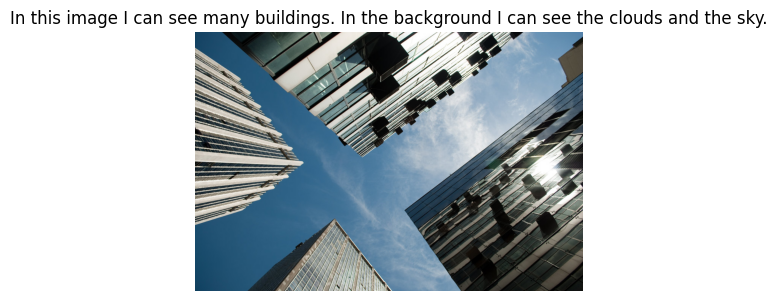

tensor[21] i64 x∈[0, 190] μ=28.619 σ=49.915

In [ ]:
from collections import Counter
from torchtext.vocab import Vocab
all_captions = data['caption'].tolist()
all_tokens = [caption.lower().split() for caption in all_captions]
word_counts = Counter()
for tokens in all_tokens:
    word_counts.update(tokens)
vocab = Vocab(word_counts, specials=['<unk>', '<pad>', '<start>', '<end>'])
image, target, caption = trn_ds.choose()
show(image, title=caption, sz=5)
print(target)


In [ ]:
import torch
# Create the dataloaders for the datasets
trn_dl = DataLoader(trn_ds, 32, collate_fn=trn_ds.collate_fn)
val_dl = DataLoader(val_ds, 32, collate_fn=val_ds.collate_fn)

# Extract a batch from the DataLoader
batch = next(iter(trn_dl))

# Assuming `batch` is a tuple
images = batch[0]
targets = batch[1]
lengths = batch[2]

# Print the shapes or inspect the contents of the components
print("Images shape:", images.shape)
print("Targets shape:", targets.shape)
print("Lengths shape:", lengths.shape)


Images shape:
torch.Size([32, 3, 224, 224])

Targets shape:
torch.Size([32, 96])

Lengths shape:
torch.Size([32])

In [ ]:
from torch.nn.utils.rnn import pack_padded_sequence
from torchvision import models

In [ ]:
# The network class - EncoderCNN
class EncoderCNN(nn.Module):

    # Load the pretrained ResNet-152 and replace top fc layer
    def __init__(self, embed_size):
        super(EncoderCNN, self).__init__()
        resnet = models.resnet152(pretrained=True)

        # Felete the last fc layer.
        modules = list(resnet.children())[:-1]

        # Connect it to a linear layer
        self.resnet = nn.Sequential(*modules)
        self.linear = nn.Linear(resnet.fc.in_features, embed_size)

        # Pass it through batch normalization
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)

    # Extract feature vectors from input images
    def forward(self, images):
        with torch.no_grad():
            features = self.resnet(images)

        features = features.reshape(features.size(0), -1)
        features = self.bn(self.linear(features))

        return features

In [ ]:
# Creating encoder instance
encoder = EncoderCNN(256).to(device)
!pip install torch_summary
from torchsummary import summary as torchsummary
print(torchsummary(encoder, input_size=(3, 224, 224)))


Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:02<00:00, 92.8MB/s]


Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       9,408
|    └─BatchNorm2d: 2-2                  128
|    └─ReLU: 2-3                         --
|    └─MaxPool2d: 2-4                    --
|    └─Sequential: 2-5                   --
|    |    └─Bottleneck: 3-1              75,008
|    |    └─Bottleneck: 3-2              70,400
|    |    └─Bottleneck: 3-3              70,400
|    └─Sequential: 2-6                   --
|    |    └─Bottleneck: 3-4              379,392
|    |    └─Bottleneck: 3-5              280,064
|    |    └─Bottleneck: 3-6              280,064
|    |    └─Bottleneck: 3-7              280,064
|    |    └─Bottleneck: 3-8              280,064
|    |    └─Bottleneck: 3-9              280,064
|    |    └─Bottleneck: 3-10             280,064
|    |    └─Bottleneck: 3-11             280,064
|    └─Sequential: 2-7                   --
|    |    └─Bottleneck: 3-12             1,512,448
|    |  

=================================================================
Layer (type:depth-idx)                   Param #
=================================================================
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       9,408
|    └─BatchNorm2d: 2-2                  128
|    └─ReLU: 2-3                         --
|    └─MaxPool2d: 2-4                    --
|    └─Sequential: 2-5                   --
|    |    └─Bottleneck: 3-1              75,008
|    |    └─Bottleneck: 3-2              70,400
|    |    └─Bottleneck: 3-3              70,400
|    └─Sequential: 2-6                   --
|    |    └─Bottleneck: 3-4              379,392
|    |    └─Bottleneck: 3-5              280,064
|    |    └─Bottleneck: 3-6              280,064
|    |    └─Bottleneck: 3-7              280,064
|    |    └─Bottleneck: 3-8              280,064
|    |    └─Bottleneck: 3-9              280,064
|    |    └─Bottleneck: 3-10             280,064
|    |    └─Bottleneck: 3-11             280,064
|    └─Sequential: 2-7                   --
|    |    └─Bottleneck: 3-12             1,512,448
|    |    └─Bottleneck: 3-13             1,117,184
|    |    └─Bottleneck: 3-14             1,117,184
|    |    └─Bottleneck: 3-15             1,117,184
|    |    └─Bottleneck: 3-16             1,117,184
|    |    └─Bottleneck: 3-17             1,117,184
|    |    └─Bottleneck: 3-18             1,117,184
|    |    └─Bottleneck: 3-19             1,117,184
|    |    └─Bottleneck: 3-20             1,117,184
|    |    └─Bottleneck: 3-21             1,117,184
|    |    └─Bottleneck: 3-22             1,117,184
|    |    └─Bottleneck: 3-23             1,117,184
|    |    └─Bottleneck: 3-24             1,117,184
|    |    └─Bottleneck: 3-25             1,117,184
|    |    └─Bottleneck: 3-26             1,117,184
|    |    └─Bottleneck: 3-27             1,117,184
|    |    └─Bottleneck: 3-28             1,117,184
|    |    └─Bottleneck: 3-29             1,117,184
|    |    └─Bottleneck: 3-30             1,117,184
|    |    └─Bottleneck: 3-31             1,117,184
|    |    └─Bottleneck: 3-32             1,117,184
|    |    └─Bottleneck: 3-33             1,117,184
|    |    └─Bottleneck: 3-34             1,117,184
|    |    └─Bottleneck: 3-35             1,117,184
|    |    └─Bottleneck: 3-36             1,117,184
|    |    └─Bottleneck: 3-37             1,117,184
|    |    └─Bottleneck: 3-38             1,117,184
|    |    └─Bottleneck: 3-39             1,117,184
|    |    └─Bottleneck: 3-40             1,117,184
|    |    └─Bottleneck: 3-41             1,117,184
|    |    └─Bottleneck: 3-42             1,117,184
|    |    └─Bottleneck: 3-43             1,117,184
|    |    └─Bottleneck: 3-44             1,117,184
|    |    └─Bottleneck: 3-45             1,117,184
|    |    └─Bottleneck: 3-46             1,117,184
|    |    └─Bottleneck: 3-47             1,117,184
|    └─Sequential: 2-8                   --
|    |    └─Bottleneck: 3-48             6,039,552
|    |    └─Bottleneck: 3-49             4,462,592
|    |    └─Bottleneck: 3-50             4,462,592
|    └─AdaptiveAvgPool2d: 2-9            --
├─Linear: 1-2                            524,544
├─BatchNorm1d: 1-3                       512
=================================================================
Total params: 58,668,864
Trainable params: 58,668,864
Non-trainable params: 0
=================================================================

In [ ]:
# Define the decoder architecture – DecoderRNN
class DecoderRNN(nn.Module):

    # Set the hyper-parameters and build the layers
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers, max_seq_length=80):

        super(DecoderRNN, self).__init__()

        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length

    # Decode image feature vectors and generates captions
    def forward(self, features, captions, lengths):
        embeddings = self.embed(captions)
        embeddings = torch.cat((features.unsqueeze(1), embeddings), 1)

        packed = pack_padded_sequence(embeddings, lengths.cpu(), batch_first=True)

        outputs, _ = self.lstm(packed)
        outputs = self.linear(outputs[0])
        return outputs

    #Generate captions for given image features using greedy search
    def predict(self, features, states=None):
        sampled_ids = []
        inputs = features.unsqueeze(1)

        for i in range(self.max_seq_length):
            hiddens, states = self.lstm(inputs, states) # hiddens: (batch_size, 1, hidden_size)

            outputs = self.linear(hiddens.squeeze(1)) # outputs: (batch_size, vocab_size)
            _, predicted = outputs.max(1) # predicted: (batch_size)

            sampled_ids.append(predicted)

            inputs = self.embed(predicted) # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1) # inputs: (batch_size, 1, embed_size)


        sampled_ids = torch.stack(sampled_ids, 1) # sampled_ids: (batch_size, max_seq_length)

        # convert predicted tokens to strings
        sentences = []
        for sampled_id in sampled_ids:
            sampled_id = sampled_id.cpu().numpy()
            sampled_caption = []

            for word_id in sampled_id:
                word = vocab.itos[word_id]
                sampled_caption.append(word)

                if word == '':
                    break

            sentence = ' '.join(sampled_caption)
            sentences.append(sentence)

        return sentences


In [ ]:
# Trains on a single batch of data
def train_batch(data, encoder, decoder, optimizer, criterion):
    encoder.train()
    decoder.train()

    images, captions, lengths = data
    images = images.to(device)

    captions = captions.to(device)
    targets = pack_padded_sequence(captions, lengths.cpu(), batch_first=True)[0]

    features = encoder(images)
    outputs = decoder(features, captions, lengths)
    loss = criterion(outputs, targets)

    decoder.zero_grad()
    encoder.zero_grad()
    loss.backward()
    optimizer.step()
    torch.save(encoder.state_dict(), 'encoder_checkpoint.pt')
    torch.save(decoder.state_dict(), 'decoder_checkpoint.pt')



    return loss


In [ ]:
# Validate on a batch of data
@torch.no_grad()
def validate_batch(data, encoder, decoder, criterion):
    encoder.eval()
    decoder.eval()

    images, captions, lengths = data
    images = images.to(device)

    captions = captions.to(device)
    targets = pack_padded_sequence(captions, lengths.cpu(), batch_first=True)[0]

    features = encoder(images)
    outputs = decoder(features, captions, lengths)

    loss = criterion(outputs, targets)
    return loss


In [ ]:
# Define encoder, decoder, loss function, and optimizer
encoder = EncoderCNN(256).to(device)
decoder = DecoderRNN(256, 512, len(vocab.itos), 1).to(device)
criterion = nn.CrossEntropyLoss()

params = list(decoder.parameters()) + \
         list(encoder.linear.parameters()) + \
         list(encoder.bn.parameters())

optimizer = torch.optim.AdamW(params, lr=1e-3)

n_epochs = 5 # Doing 5 instead of 10 because training on CPU
log = Report(n_epochs)


In [ ]:
# Train the model over increasing epochs
for epoch in range(n_epochs):
    if epoch == 3: optimizer = torch.optim.AdamW(params, lr=1e-4)

    N = len(trn_dl)
    for i, data in enumerate(trn_dl):
        trn_loss = train_batch(data, encoder, decoder, optimizer, criterion)
        pos = epoch + (1+i)/N
        log.record(pos=pos, trn_loss=trn_loss, end='\r')

    N = len(val_dl)

    for i, data in enumerate(val_dl):
        val_loss = validate_batch(data, encoder, decoder, criterion)
        pos = epoch + (1+i)/N
        log.record(pos=pos, val_loss=val_loss, end='\r')

    log.report_avgs(epoch+1)

log.plot_epochs(log=True)


EPOCH: 1.000  val_loss: 2.684  trn_loss: 3.327  (964.92s - 3859.69s remaining)
EPOCH: 2.000  val_loss: 2.469  trn_loss: 2.507  (1929.41s - 2894.11s remaining)
EPOCH: 2.872  trn_loss: 2.235  (2737.23s - 2027.34s remaining)

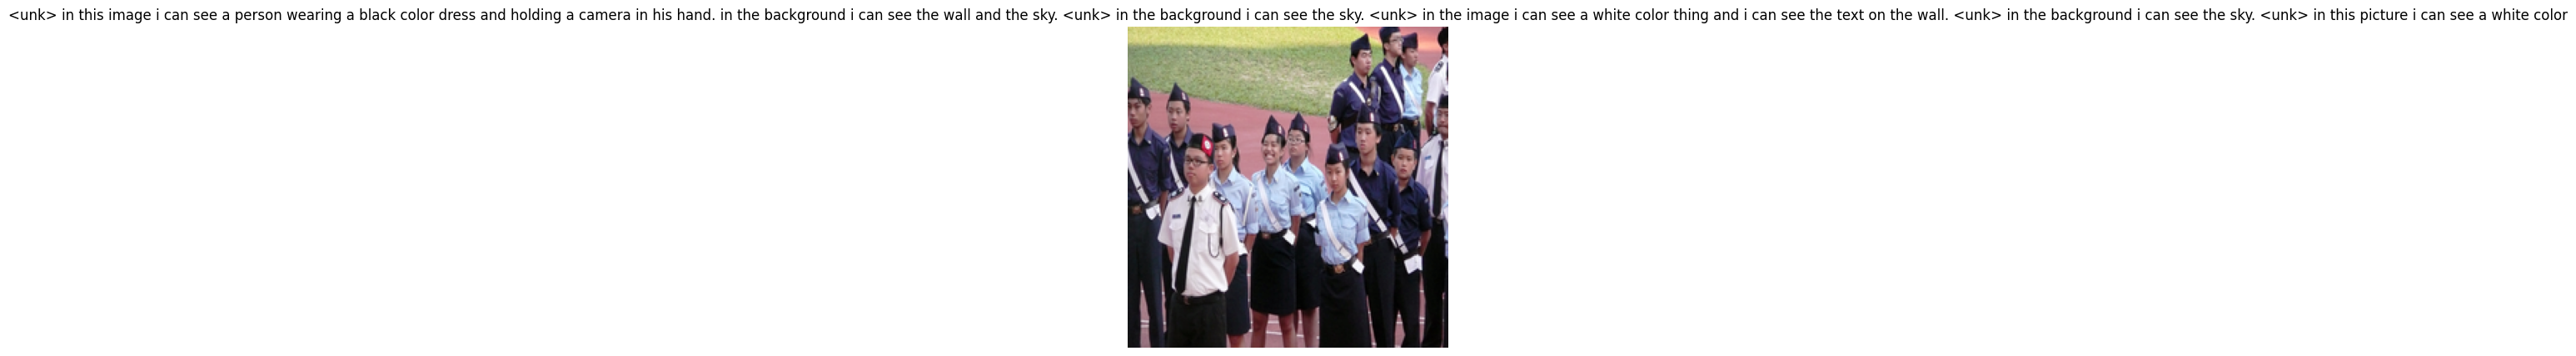

Caption: <unk> in this image i can see a person wearing a black color dress and holding a camera in his hand. in 
the background i can see the wall and the sky. <unk> in the background i can see the sky. <unk> in the image i can 
see a white color thing and i can see the text on the wall. <unk> in the background i can see the sky. <unk> in 
this picture i can see a white color

In [ ]:
import random
import torch
import torchvision.transforms as transforms
from PIL import Image
from glob import glob

# Set random seed for reproducibility
random.seed(42)
torch.manual_seed(42)

# Generates predictions given an image
def load_image(image_path, transform=None):
    image = Image.open(image_path).convert('RGB')
    image = image.resize([224, 224], Image.LANCZOS)

    if transform is not None:
        tfm_image = transform(image)[None]

    return image, tfm_image

def load_image_and_predict(image_path, encoder, decoder, device):
    transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                    ])

    org_image, tfm_image = load_image(image_path, transform)
    image_tensor = tfm_image.to(device)

    encoder.eval()
    decoder.eval()

    feature = encoder(image_tensor)

    sentence = decoder.predict(feature)[0]

    show(org_image, title=sentence)
    return sentence

def generate_caption(image_folder, encoder_checkpoint, decoder_checkpoint, device):
    # Instantiate your encoder and decoder models
    encoder = EncoderCNN(embed_size=256).to(device)
    decoder = DecoderRNN(embed_size=256, hidden_size=512, vocab_size=5721, num_layers=1).to(device)

    # Load pre-trained weights for encoder and decoder
    encoder.load_state_dict(torch.load(encoder_checkpoint, map_location=device))
    decoder.load_state_dict(torch.load(decoder_checkpoint, map_location=device))

    # Predict images
    files = Glob('val-images')
    image_path = random.choice(files)  # Choose a random image file

    sentence = load_image_and_predict(image_path, encoder, decoder, device)
    print("Caption:", sentence)

# Set the device to either CUDA (GPU) or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the paths to the image folder and checkpoints
image_folder = 'val-images'
encoder_checkpoint = 'encoder_checkpoint.pt'
decoder_checkpoint = 'decoder_checkpoint.pt'

generate_caption(image_folder, encoder_checkpoint, decoder_checkpoint, device)
